# Elon Musk Classifier

Tried to build a classifier to identify whether Elon Musk is smiling or not in a given picture.

In [0]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

I used this first cell to fix the GPU memory problem. Apparently, Google gives some users only 0.5GB RAM of what supposed to be a 24GB GPU RAM.

I got the code at [Stack](https://stackoverflow.com/questions/48750199/google-colaboratory-misleading-information-about-its-gpu-only-5-ram-available) and it totally fixed the problem.

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
path = Path('drive/My Drive/data/elon musk')

In [0]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.3, size=(600,700), bs=16).normalize(imagenet_stats)

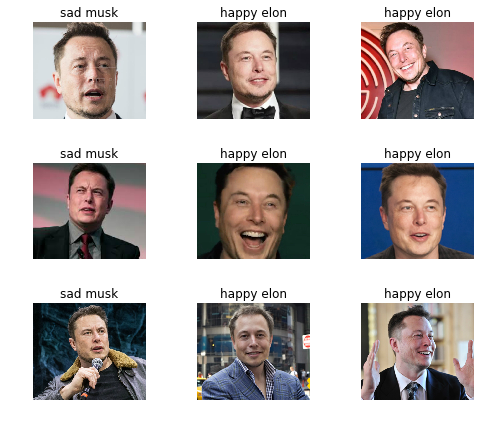

In [7]:
data.show_batch(rows=3, figsize=(7,6))

In [0]:
classes = ['happy elon', 'sad musk']

In [9]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:03<00:00, 27998042.04it/s]


In [0]:
learn.model

In [14]:
learn.fit_one_cycle(14)

epoch,train_loss,valid_loss,error_rate,time
0,0.247171,0.847356,0.666667,00:03
1,0.233308,0.908084,0.583333,00:03
2,0.187785,1.078488,0.583333,00:03
3,0.161986,1.830046,0.541667,00:03
4,0.171919,1.549955,0.458333,00:03
5,0.171911,2.762295,0.583333,00:03
6,0.167338,1.242844,0.291667,00:03
7,0.159622,0.505991,0.208333,00:03
8,0.147596,0.688234,0.208333,00:03
9,0.142241,0.815791,0.208333,00:03
